## Business Understanding:
Richard sebagai online retailer ingin mengklasifikasi customer yang akan beli cepat, beli nanti, atau kapan-kapan. Dengan hal tersebut diharapkan dia dapat mengatur target pemasaran kepada customer yang tepat.

Supervised Learning - Klasifikasi

Kemungkinan Algoritma:
- Decision Tree
- Random Forest
- Logistic Regresion
- SVM

Variable Target: tablet_adoption

class:
1. Innovator
2. Early Adopter
3. Early Majority
4. Late Majority

## Data Understanding


In [1]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/Chapter10DataSet_Training.csv'
load_tablet_adoption = pd.read_csv(url)

In [4]:
df = pd.DataFrame(load_tablet_adoption)

df.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  Tablet_Adoption            661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


Data tersebut banyak bertipe string sehingga pada pengolahan data diperlukan labeling dengan encoder

In [10]:
# Target Variable
df['Tablet_Adoption'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Tablet_Adoption, dtype: int64

In [11]:
# cek null value
# kesalahan pas input data
df.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

In [12]:
# kesalahan pas transform data
df.isna().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

## Data Preparation

In [13]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

# membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [14]:
df_input=pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)

In [15]:
df_input.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,599,1,45,0,2,1,1,1,0,0,3
1,388,1,11,0,1,1,0,1,0,0,2
2,178,0,13,0,2,1,1,1,1,0,0
3,393,1,33,0,2,1,1,1,1,3,0
4,207,1,13,1,2,1,1,1,0,3,3


In [16]:
# kita harus tahu hasil encoder dari fild target

df_input['Tablet_Adoption'].value_counts()

0    205
1    186
3    172
2     98
Name: Tablet_Adoption, dtype: int64

0 --> Early Adopter
1 --> Early Majority
2 --> Late Majority
3 --> Innovator

## Pemodelan Data

In [17]:
# Spliting training dan testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [18]:
# Evaluasi Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [19]:
# Input Variabel

x = df_input[['Gender',	'Age',	'Marital_Status',	'Website_Activity',	'Browsed_Electronics_12Mo',	'Bought_Electronics_12Mo',	'Bought_Digital_Media_18Mo',	'Bought_Digital_Books',	'Payment_Method']]

# Target Variabel
y = df_input['Tablet_Adoption'].astype('category')

In [20]:
# Spliting trainig and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [29]:
# Membuat objek algoritma Decision Tree klasifikasi
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6)

# Memodelkan data menggunakan algoritma Decision Tree
model_tree = tree.fit(x_train,y_train)

# Melakukan predict pada data test
pred_tree = model_tree.predict(x_test)

## Evaluasi Decision Tree

In [30]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        66
           1       0.70      0.33      0.45        57
           2       0.44      0.48      0.46        29
           3       0.69      0.81      0.75        47

    accuracy                           0.57       199
   macro avg       0.58      0.57      0.56       199
weighted avg       0.60      0.57      0.56       199



Text(113.9222222222222, 0.5, 'predicted  label')

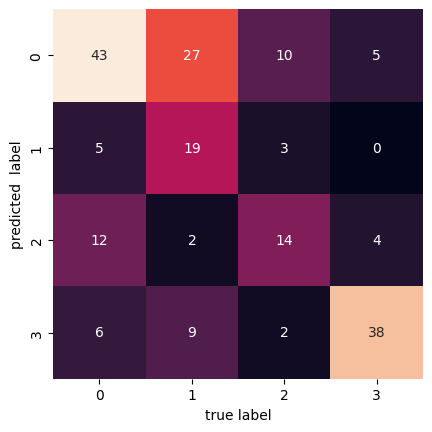

In [31]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

terjadi overfitting pada permodelan ini

<Axes: >

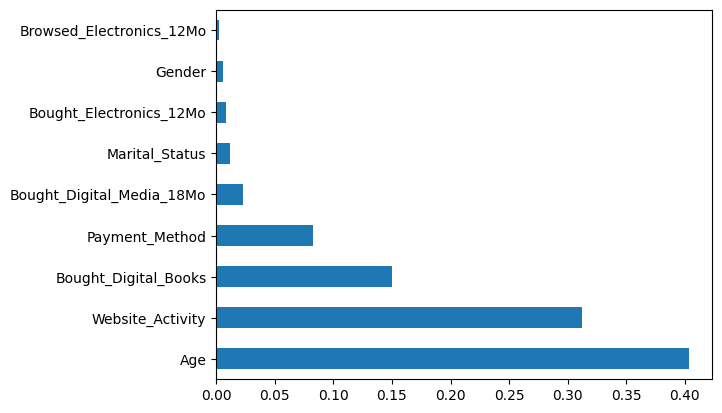

In [32]:
# signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## K - Fold Validation
K-Fold Cross Validation adalah salah satu dari jenis cross validation yang berfungsi untuk menilai kinerja proses sebuah metode algoritma dengan membagi sample data secara acak dan mengelompokkan data tersebut sebanyak nilai K -  Fold

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(model_tree, x, y, cv=10, scoring= 'f1_macro')

In [42]:
scores

array([0.66299841, 0.68782051, 0.54105976, 0.60467775, 0.68163558,
       0.5323214 , 0.68611857, 0.60203036, 0.31814127, 0.23830011])

In [43]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.56 accuracy with a standard deviation of 0.15


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [94]:
# Membuat objek algoritma Random Forest klasifikasi
clf_rf = RandomForestClassifier(n_estimators=600, max_depth=6)

# Memodelkan data menggunakan algoritma Decision Tree
model_rf = clf_rf.fit(x_train,y_train)

# Melakukan predict pada data test
pred_rf= model_rf.predict(x_test)

## Evaluasi Random Forest

In [95]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63        66
           1       0.81      0.44      0.57        57
           2       0.46      0.66      0.54        29
           3       0.70      0.79      0.74        47

    accuracy                           0.63       199
   macro avg       0.64      0.64      0.62       199
weighted avg       0.66      0.63      0.63       199



Text(113.9222222222222, 0.5, 'predicted  label')

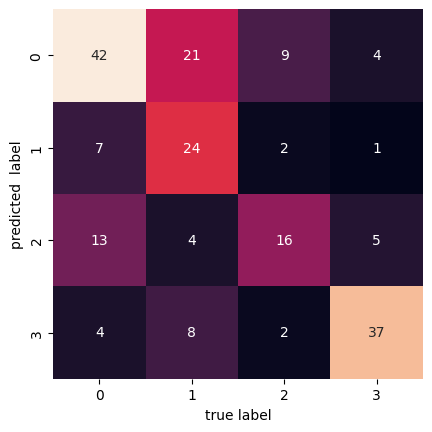

In [59]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

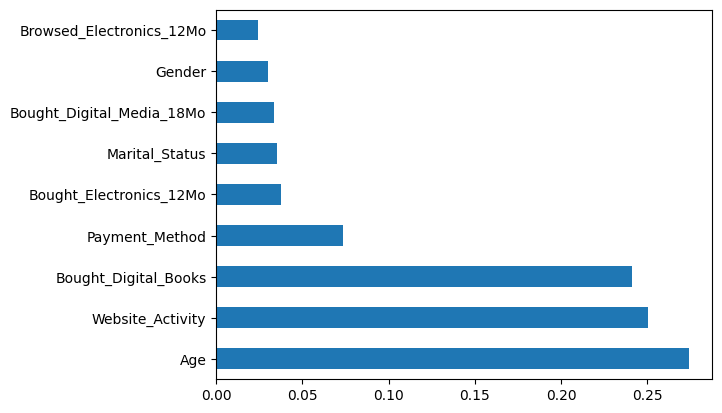

In [60]:
# signifikan faktor dari model Random Forest tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [66]:
scores = cross_val_score(model_rf, x, y, cv=10, scoring= 'f1_macro')

In [67]:
scores

array([0.65289294, 0.58380952, 0.64360498, 0.66721208, 0.70698287,
       0.56551937, 0.72580645, 0.74879162, 0.28574179, 0.2142414 ])

In [68]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.58 accuracy with a standard deviation of 0.17


## XGBOOST Classifier

In [61]:
from xgboost import XGBClassifier

In [62]:
# Membuat objek algoritma XGBOOST klasifikasi
clf_xg = XGBClassifier()

# Memodelkan data menggunakan algoritma Decision Tree
model_xg = clf_xg.fit(x_train,y_train)

# Melakukan predict pada data test
pred_xg= model_xg.predict(x_test)

## Evaluasi XGBOOST

In [63]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48        66
           1       0.58      0.58      0.58        57
           2       0.43      0.55      0.48        29
           3       0.59      0.64      0.61        47

    accuracy                           0.54       199
   macro avg       0.53      0.55      0.54       199
weighted avg       0.55      0.54      0.54       199



Text(113.9222222222222, 0.5, 'predicted  label')

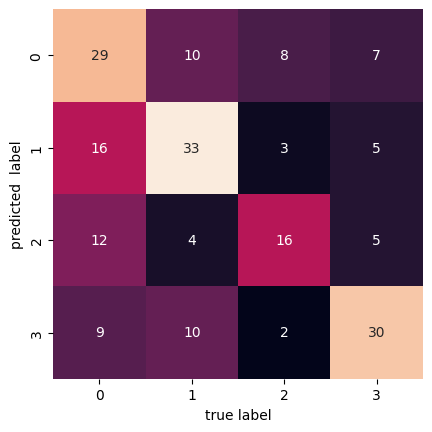

In [64]:
# Visualize the confusion matrix of XGBOOST
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

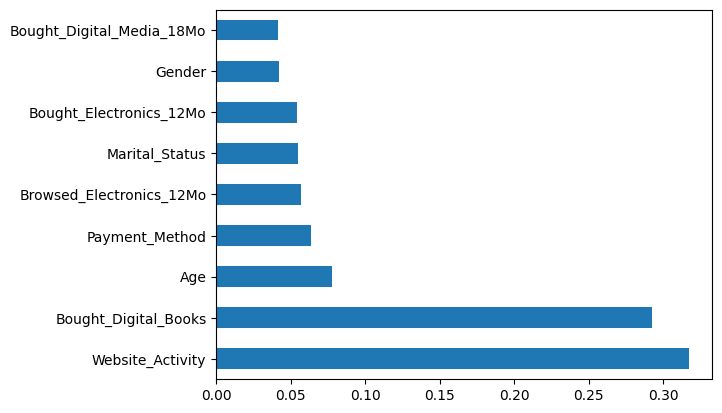

In [65]:
# signifikan faktor dari model XGBOOST tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [77]:
scores = cross_val_score(model_xg, x, y, cv=10, scoring= 'f1_macro')

In [78]:
scores

array([0.6405875 , 0.72486246, 0.45961342, 0.24562226, 0.52574876,
       0.65309529, 0.76760425, 0.72202381, 0.30586178, 0.20108696])

In [79]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.52 accuracy with a standard deviation of 0.20


## Logistic Regression

In [74]:
# Import SVM
from sklearn.svm import SVC

In [75]:
# Membuat objek algoritma SVM
clf_svm = SVC(kernel='linear', random_state=0)

# Memodelkan data menggunakan algoritma Decision Tree
model_svm = clf_svm.fit(x_train,y_train)

# Melakukan predict pada data test
pred_svm = model_svm.predict(x_test)

In [76]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59        66
           1       0.66      0.54      0.60        57
           2       0.44      0.62      0.51        29
           3       0.71      0.74      0.73        47

    accuracy                           0.61       199
   macro avg       0.61      0.62      0.61       199
weighted avg       0.62      0.61      0.61       199



In [83]:
scores = cross_val_score(model_svm, x, y, cv=5, scoring= 'f1_macro')

In [84]:
scores

array([0.59589134, 0.68318954, 0.6377779 , 0.72820716, 0.24465045])

In [85]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.58 accuracy with a standard deviation of 0.17
